<a href="https://colab.research.google.com/github/hojoooon/PDM16/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


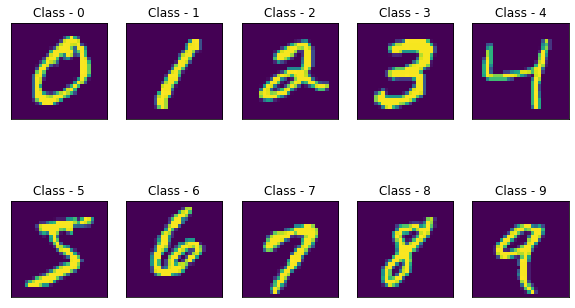

In [4]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [5]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [6]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [7]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32,  # 컬러까지 출력하기 위해 input_shape가 3임 32개의 뉴런
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),  # strides는 컨벌루션 3,3 이 한칸씩 이동한다는뜻
    MaxPool2D(pool_size=(2,2), strides=(2,2)), # 컨벌루션된 값 4개중 가장 큰값 선택 2,2는 중복을 안함 그래서 strides가 2,2
    Flatten(), # 이 줄이 없을 경우 c1f2.fit에 오류 발생 4번째 아래
    keras.layers.Dense(128, activation='relu'),  #128개의 뉴런
    keras.layers.Dropout(0.25), #25퍼센트를 빼버리고 출력 레이어로 보냄
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',  
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [8]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [9]:
3*3*32+32   # conv2d_1이 320인 이유
            # 3,3필터가 32개의 뉴런 + 32개의 바이어스

320

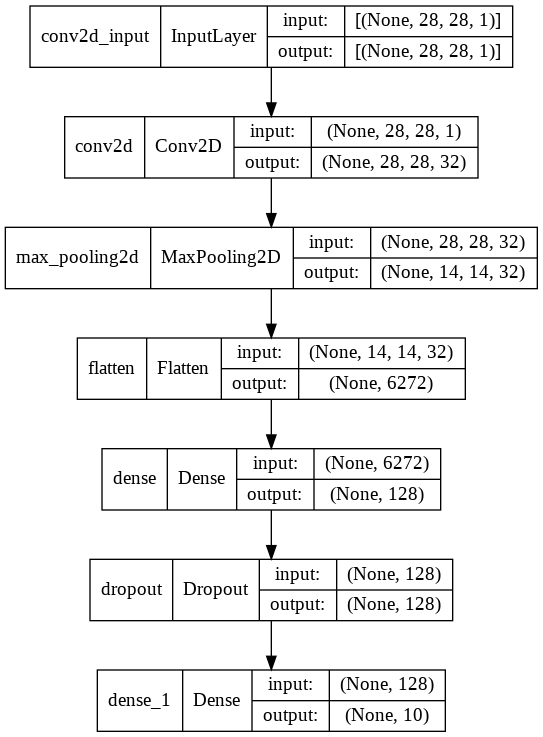

In [10]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [11]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test)) # ValueError: Shapes (100, 10) and (100, 14, 14, 10) are incompatible
#

Epoch 1/20
600/600 [==============================] - 18s 8ms/step - loss: 0.2419 - accuracy: 0.9289 - val_loss: 0.0769 - val_accuracy: 0.9758
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0818 - accuracy: 0.9761 - val_loss: 0.0557 - val_accuracy: 0.9814
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0445 - val_accuracy: 0.9848
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0390 - val_accuracy: 0.9863
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0410 - val_accuracy: 0.9862
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0374 - val_accuracy: 0.9878
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0352 - val_accuracy: 0.9879
Epoch

In [12]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0454 - accuracy: 0.9885


[0.04540741443634033, 0.9884999990463257]

---

## **CNN1 + FCN3**

In [13]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [14]:
c1f3 = tf.keras.models.Sequential([
    Conv2D(input_shape=(28,28,1), filters= 32,  # 컬러까지 출력하기 위해 input_shape가 3임  32개의 뉴런
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),  # strides는 컨벌루션 3,3 이 한칸씩 이동한다는뜻
    MaxPool2D(pool_size=(2,2), strides=(2,2)), # 컨벌루션된 값 4개중 가장 큰값 선택 2,2는 중복을 안함 그래서 strides가 2,2
    Flatten(), 
    tf.keras.layers.Dense(256, activation='relu'),  #fcn1
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  #fcn2
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax') #fcn 3개로 구성
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [15]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                      

In [16]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100) #훈련시킴

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2414 - accuracy: 0.9268
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0747 - accuracy: 0.9771
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0522 - accuracy: 0.9839
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0374 - accuracy: 0.9880
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0151 - accuracy: 0.9950
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0132 - accuracy: 0.9957

In [17]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 4ms/step - loss: 0.0511 - accuracy: 0.9904


[0.05110777169466019, 0.9904000163078308]

## **CNN2 + FCN2**

In [18]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [19]:
c2f2 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64,  # 컬러까지 출력하기 위해 input_shape가 3임  32개의 뉴런
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),  # strides는 컨벌루션 3,3 이 한칸씩 이동한다는뜻
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 32,  # 2번째 Conv2D 두번째는 input_shape가 필요없음
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), # 컨벌루션된 값 4개중 가장 큰값 선택 2,2는 중복을 안함 그래서 strides가 2,2
    Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [20]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [21]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)  #train에 대한 accuracy라 별로 중요하지않음
                                                            #네트워크 상황에 따라 어떻게 작동하는지 확인을 위해 실행

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2203 - accuracy: 0.9329
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0664 - accuracy: 0.9799
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0461 - accuracy: 0.9857
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0368 - accuracy: 0.9883
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0253 - accuracy: 0.9920
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0236 - accuracy: 0.9923
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0163 - accuracy: 0.9946
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0147 - accuracy: 0.9953

In [22]:
c2f2.evaluate(X_test, y_test, batch_size = 100) #test 데이터에서 평가

100/100 [==============================] - 1s 6ms/step - loss: 0.0257 - accuracy: 0.9935


[0.02568470686674118, 0.9934999942779541]

## **CNN2 + FCN3**

In [23]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [24]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64,  # 컬러까지 출력하기 위해 input_shape가 3임  32개의 뉴런 c1
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),  # strides는 컨벌루션 3,3 이 한칸씩 이동한다는뜻
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 32,  # 2번째 Conv2D 두번째는 input_shape가 필요없음 c2
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), # 컨벌루션된 값 4개중 가장 큰값 선택 2,2는 중복을 안함 그래서 strides가 2,2
    Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'), #f1  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  #f2  
    tf.keras.layers.Dropout(0.25),              
    tf.keras.layers.Dense(10, activation='softmax') #f3
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [25]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [26]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3015 - accuracy: 0.9068
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0893 - accuracy: 0.9740
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0619 - accuracy: 0.9825
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0506 - accuracy: 0.9854
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0359 - accuracy: 0.9900
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0311 - accuracy: 0.9906
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0271 - accuracy: 0.9915
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0231 - accuracy: 0.9930
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0215 - accuracy: 0.9932

In [27]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0321 - accuracy: 0.9926


[0.03209264203906059, 0.9926000237464905]

In [28]:
c2f3.save('c2f3_best.hdf5')

# **[DIY] Hidden layer에 따른 정확도**

In [29]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.9904


[0.05110777169466019, 0.9904000163078308]

In [30]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0454 - accuracy: 0.9885


[0.04540741443634033, 0.9884999990463257]

In [31]:
# Try another method!!  
cnn_result = [[0.04554083198308945, 0.9894999861717224], #c1f2 결과
 [0.057263847440481186, 0.9886999726295471], #c1f3 결과
 [0.028542926535010338, 0.9925000071525574], #c2f2
 [0.041836198419332504, 0.9909999966621399]]   #c2f3 결과

In [32]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.9894999861717224,
 0.9886999726295471,
 0.9925000071525574,
 0.9909999966621399]

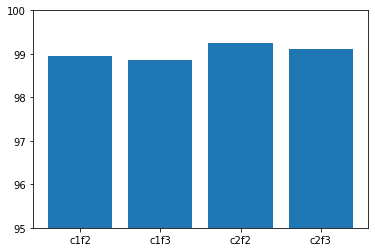

In [33]:
x = np.arange(4)
cnns = ['c1f2','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [34]:
c2f2.save('c2f2_best.hdf5') #결과가 가장 좋은 c2f2를 저장

In [35]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0257 - accuracy: 0.9935


[0.02568470686674118, 0.9934999942779541]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [36]:
hist = c2f2.fit(X_train, y_train,  #위의 c2f2 모델을 다시 실행시켜서 초기화 시키고 훈련 시켜야함
         epochs = 20 ,             
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0330 - val_accuracy: 0.9922
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0282 - val_accuracy: 0.9932
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.0295 - val_accuracy: 0.9929
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.0316 - val_accuracy: 0.9928
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0338 - val_accuracy: 0.9921
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0334 - val_accuracy: 0.9925
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0400 - val_accuracy: 0.9927
Ep

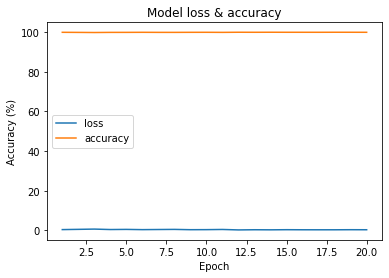

In [37]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

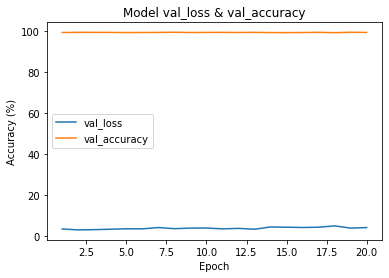

In [38]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

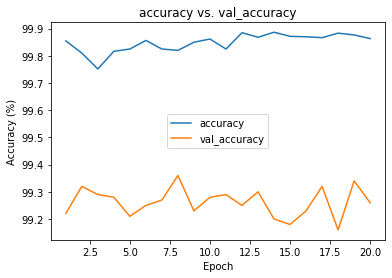

In [39]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [40]:
# Code here!
from keras.models import load_model

model = load_model('c2f3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0321 - accuracy: 0.9926


[0.03209264203906059, 0.9926000237464905]

In [41]:
hist = model.fit(X_train, y_train, 
         epochs = 20 ,             
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0318 - val_accuracy: 0.9924
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0354 - val_accuracy: 0.9923
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0417 - val_accuracy: 0.9915
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0374 - val_accuracy: 0.9919
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0367 - val_accuracy: 0.9924
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0409 - val_accuracy: 0.9921
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0392 - val_accuracy: 0.9921

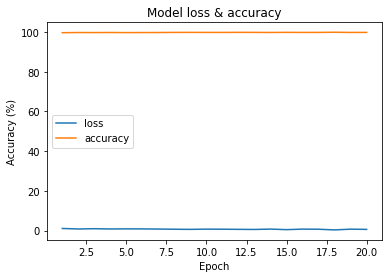

In [42]:
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

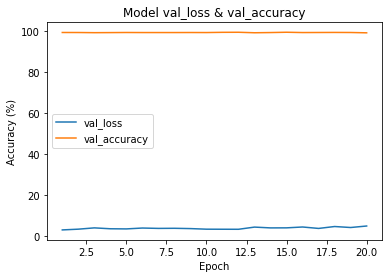

In [43]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

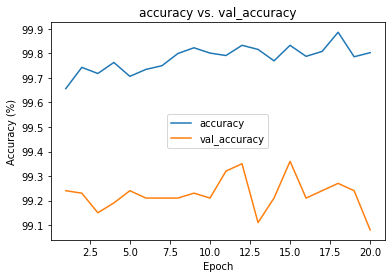

In [44]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')